### Monkbrill filtering plot

In [2]:
import os
from collections import Counter
import shutil
import matplotlib.pyplot as plt

goodOutputsFolder = "Data\\letters_temp"
os.makedirs(goodOutputsFolder, exist_ok = True)
badOutputsFolder = "Data\\shit"
os.makedirs(badOutputsFolder, exist_ok = True)

root = "monkbrill2/"
extracts = []
shapesDict = {}

positionThreshold = 50
dimensionThreshold = 5

kept_list = []
discarded_list = []
letter_classes = []

print("kept, discarded, letter class")

for folder in os.listdir(root):
    discarded = 0
    kept = 0
    folder_path = os.path.join(root, folder)
    
    for filename in os.listdir(folder_path):
        if "PaxHeader" in filename:
            continue
        split = filename.split("-")[9:13]
        file_path = os.path.join(folder_path, filename)

        target_folder = os.path.join(goodOutputsFolder, folder)
        os.makedirs(target_folder, exist_ok = True)
        target_file_path = os.path.join(target_folder, filename)

        try: # there are two files in the whole monkbrill2 folder that have a different naming convention (but they are both safe to keep without dataset leakage)

            x_pos, y_pos = int(split[0].split("=")[1]), int(split[1].split("=")[1])
            width, height = int(split[2].split("=")[1]), int(split[3].split("=")[1])
        
            extract_file = filename.split("-")[2]  # which DSS extract this letter image came from

            if extract_file in shapesDict.keys():
                seen_before = False
                for know_img in shapesDict[extract_file]:
                    [known_x, known_y, known_width, known_height] = know_img
                    # if their x, y positions are similar, AND they have similar image dimensions; ignore this image
                    if abs(known_x - x_pos) < positionThreshold and abs(known_width - width) < dimensionThreshold:
                        if abs(known_y - y_pos) < positionThreshold and abs(known_height - height) < dimensionThreshold:
                            seen_before = True
                            break
                                
                if not seen_before:
                    shapesDict[extract_file].append([x_pos, y_pos, width, height])
                    shutil.copy(file_path, target_file_path)
                    kept +=1
                else: 
                    discarded += 1
                    target_file_path = os.path.join(badOutputsFolder, filename)
                    shutil.copy(file_path, target_file_path)

            else:
                shapesDict[extract_file] = [[x_pos, y_pos, width, height]]
                kept +=1
                
                shutil.copy(file_path, target_file_path)
        #extracts.append(split2)
        #print(x_pos, y_pos)
        #print(width, height)
        except:
            #print(filename)
            kept +=1
            shutil.copy(file_path, target_file_path)


    print(kept, discarded, folder)
    kept_list.append(kept)
    discarded_list.append(discarded)
    letter_classes.append(folder)

kept, discarded, letter class
255 45 Alef
248 52 Ayin
250 50 Bet
74 17 Dalet
253 47 Gimel
259 41 He
247 53 Het
169 24 Kaf
9 1 Kaf-final
276 18 Lamed
256 44 Mem
245 55 Mem-medial
122 8 Nun-final
253 47 Nun-medial
30 7 Pe
15 0 Pe-final
234 31 Qof
66 12 Resh
249 51 Samekh
220 80 Shin
230 70 Taw
228 72 Tet
62 11 Tsadi-final
230 70 Tsadi-medial
100 16 Waw
18 5 Yod
11 1 Zayin


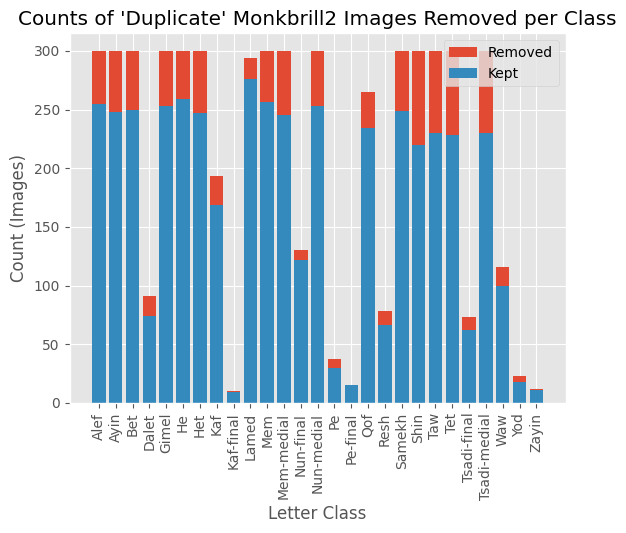

In [22]:
plt.style.use('ggplot')
fig, ax = plt.subplots()

# Stacked bar chart
ax.bar(letter_classes, discarded_list, bottom = kept_list)
ax.bar(letter_classes, kept_list)


plt.legend(["Removed", "Kept"])
plt.xticks(rotation = 90)
plt.xlabel("Letter Class")
plt.ylabel("Count (Images)")
plt.title("Counts of 'Duplicate' Monkbrill2 Images Removed per Class")
plt.show()